C:\Users\hna024\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\hna024\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\hna024\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\hna024\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or sp

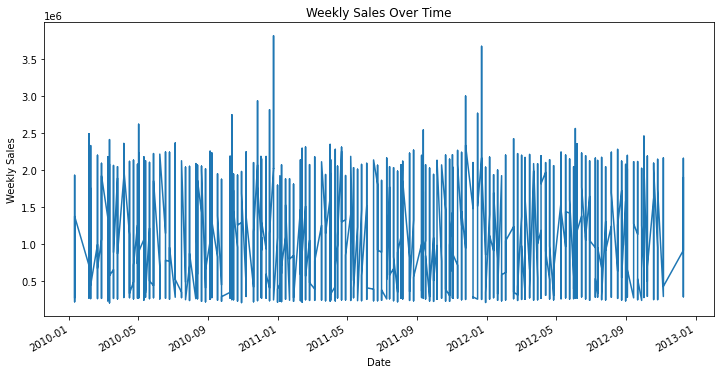

C:\Users\hna024\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hna024\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hna024\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hna024\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hna024\Anaconda3\lib\

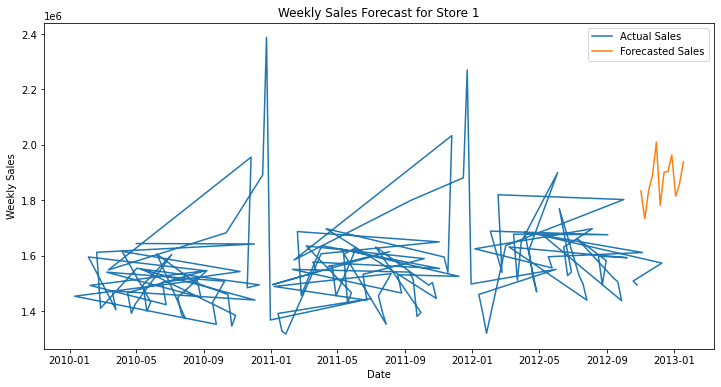

In [5]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Users/hna024/Downloads/Capstoneprojects/Walmart.csv")


# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Holiday_Flag'] = data['Holiday_Flag'].astype(int)

# Data Analysis and Insights
# Plot sales over time
plt.figure(figsize=(12, 6))
data['Weekly_Sales'].plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Forecasting
store_number = 1  # Choose a store number
sales_data = data[data['Store'] == store_number]['Weekly_Sales']

# Split data into training and testing sets
train_size = int(0.8 * len(sales_data))
train, test = sales_data[:train_size], sales_data[train_size:]

# Train SARIMA model
order = (1, 1, 1)  # Parameters of ARIMA
seasonal_order = (1, 1, 1, 12)  # Seasonal parameters
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecast for the next 12 weeks
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=test.index[-1], periods=13, freq='W-FRI')[1:]
forecast_values = forecast.predicted_mean

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data.values, label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales')
plt.title(f'Weekly Sales Forecast for Store {store_number}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()
